In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
path = '~/DATA1/hyeongu/Analysis/PRS-SI'
disease_list = ['PRAD', 'BRCA']

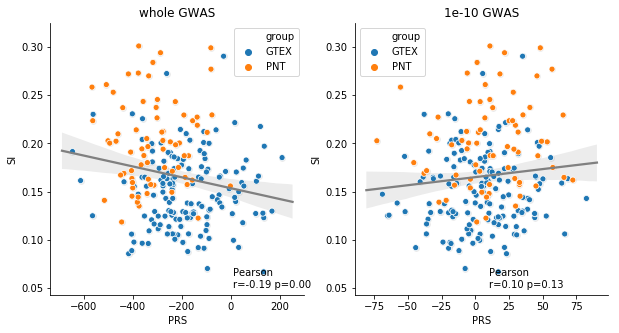

In [48]:
disease = 'BRCA'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#BRCA
#gwas= pd.read_csv('{0}/{1}/PNT-GTEX_PRS-SI.txt'.format(path, disease),
#                  sep='\t', header=0, index_col=0)
#PRAD
gwas= pd.read_csv('{0}/{1}/PNT-GTEX_1e10PRS-SI.txt'.format(path, disease),
                  sep='\t', header=0, index_col=0)
whole = pd.read_csv('{0}/{1}/PNT-GTEX_whole_PRS-SI.txt'.format(path, disease),
                  sep='\t', header=0, index_col=0)
sns.regplot(data=whole, x='PRS', y='SI', ax=axes[0],  scatter_kws={"alpha": 0.1}, color='gray')
sns.scatterplot(data=whole, x='PRS', y='SI', hue='group', ax=axes[0])
r, p = pearsonr(whole['PRS'], whole['SI'])
axes[0].text(10, 0.05, 'Pearson\nr={0:.2f} p={1:.2f}'.format(r, p))
axes[0].set_title('whole GWAS')

sns.regplot(data=gwas, x='PRS', y='SI', ax=axes[1],  scatter_kws={"alpha": 0.1}, color='gray')
sns.scatterplot(data=gwas, x='PRS', y='SI', hue='group', ax=axes[1])
r, p = pearsonr(gwas['PRS'], gwas['SI'])
axes[1].text(10, 0.05, 'Pearson\nr={0:.2f} p={1:.2f}'.format(r, p))
axes[1].set_title('1e-10 GWAS')
sns.despine()

In [43]:
whole.head()

,SI,none,PRS
sample,,,
TCGA-3C-AAAU,0.392300,0.471138,-55.040669
TCGA-4H-AAAK,0.231862,0.729202,-155.655349
TCGA-5L-AAT0,0.219236,0.561073,-65.871093
TCGA-A1-A0SB,0.310355,0.465203,-263.434398
TCGA-A1-A0SD,0.240854,0.653864,-38.639489


In [49]:
fig.savefig('/home/omics/DATA1/hyeongu/Analysis/PRS-SI/{0}/{0}_PRS_SI_correlation.png'.format(disease))
fig.savefig('/home/omics/DATA1/hyeongu/Analysis/PRS-SI/{0}/{0}_PRS_SI_correlation.pdf'.format(disease))